In [4]:
import sys
sys.path.append('..')
from config_parser import parse_opera_config
from tqdm import tqdm
import matplotlib.pyplot as plt

ImportError: attempted relative import with no known parent package

In [ ]:
config_file = "configs/butterfly.yaml"

config = parse_opera_config(config_file)

# Ensure all case variations of character names are included
CHARACTER_NAMES = [
    *config.character_names,
    *[name.lower() for name in config.character_names],
    *[name.upper() for name in config.character_names]
]

In [3]:
def plot_length_ratios(lines_de, lines_en):
    length_ratios = [len(de) / len(en) for de, en in zip(lines_de, lines_en)]
    # print a chart of length_ratios

    # Plot the length ratios
    plt.figure(figsize=(10, 5))
    plt.plot(length_ratios)
    plt.title(f'Length Ratios of {config.LANGUAGE_ID} and en Lines')
    plt.xlabel('Line Number')
    plt.ylabel('Length Ratio')
    plt.grid(True)
    plt.show()

    # Find the index where the length ratios start to deviate significantly
    threshold = 1.5  # Adjust this threshold as needed
    deviation_index = next((i for i, ratio in enumerate(length_ratios) if abs(ratio - 1) > threshold), None)

    if deviation_index is not None:
        print(f"Significant deviation starts at line {deviation_index}")
        print(f"{config.LANGUAGE_ID} line: {lines_de[deviation_index]}")
        print(f"en line: {lines_en[deviation_index]}")
    else:
        print("No significant deviation found.")

def pair_libretto_lines_simple(german_text, english_text):
    lines_de = german_text.split("\n\n")
    lines_en = english_text.split("\n\n")

    # Remove empty lines
    lines_de = [line for line in lines_de if line.strip()]
    lines_en = [line for line in lines_en if line.strip()]

    print(len(lines_de), len(lines_en))

    # print the average length of each german line
    print(sum(len(line) for line in lines_de) / len(lines_de))
    print(sum(len(line) for line in lines_en) / len(lines_en))

    print(len(lines_de), len(lines_en))

    plot_length_ratios(lines_de, lines_en)

    return list(zip(lines_de, lines_en))

526 526
123.68441064638783
127.11406844106465
526 526


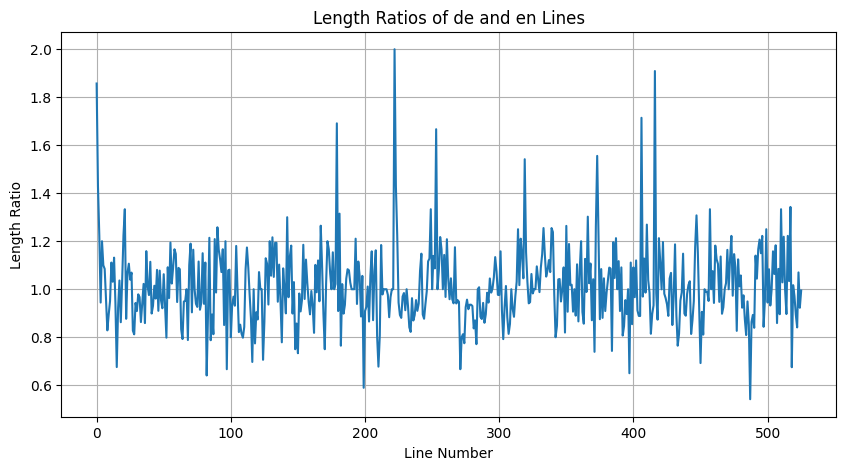

No significant deviation found.


In [4]:
with open(f"libretti/{config.FILE_PREFIX}_{config.LANGUAGE_ID}.txt", "r", encoding="utf-8") as f:
    libretto_de = f.read()

with open(f"libretti/{config.FILE_PREFIX}_en.txt", "r", encoding="utf-8") as f:
    libretto_en = f.read()

pairs = pair_libretto_lines_simple(libretto_de, libretto_en)